In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Análise I - Eficiência de Automóveis

Toda análise de dados fica muito mais simples se partirmos da necessidade de provar ou desprovar um hipótese. Essa hipótese serve como guia para nossos primeiros passos na análise, e, conforme trabalhamos o conjunto de dados, vamos complementando-a ou mesmo formulando novas hipóteses que queremos explorar.

Vamos começar com uma hipótese dada: *a eficiência (em termos de consumo de combustível) dos motores de automóveis aumentou ao longo dos anos*. 

In [2]:
tb_veic = pd.read_csv("data/dados_veiculos.csv")
pattern = r"[^a-zA-Z0-9]"
tb_veic.columns = [re.sub(pattern, "_", column.lower()) for column in tb_veic.columns]
tb_veic.describe()


,year,engine_displacement,cylinders,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [3]:
var_eff = "city_mpg"
tb_agg_year = (
    tb_veic
    .groupby('year')
    .agg(
        eff_med_ano = (var_eff, 'mean')
    )
)
tb_agg_year

,eff_med_ano
year,
1984,15.485271
1985,17.872233
1986,17.675926
1987,17.414858
1988,17.321716
1989,17.161491
1990,17.035581
1991,16.837790
1992,16.800361


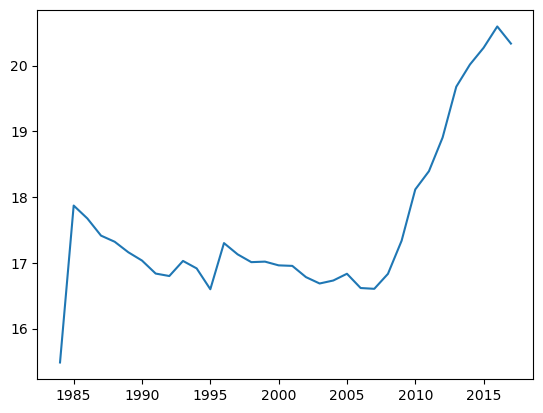

In [4]:
plt.plot(tb_agg_year)

In [5]:
var_eff = "city_mpg"
tb_agg_year = (
    tb_veic
    .groupby('year')
    .agg(
        eff_med_ano = (var_eff, 'mean'),
        eff_count_ano = (var_eff, 'count')
    )
)
tb_agg_year

,eff_med_ano,eff_count_ano
year,,
1984,15.485271,645
1985,17.872233,1581
1986,17.675926,1188
1987,17.414858,1198
1988,17.321716,1119
1989,17.161491,1127
1990,17.035581,1068
1991,16.837790,1122
1992,16.800361,1107


In [6]:
mask_year = (tb_veic['year'] <= 2016) & (tb_veic['year'] >= 1986)
tb_veic = tb_veic[mask_year].copy()

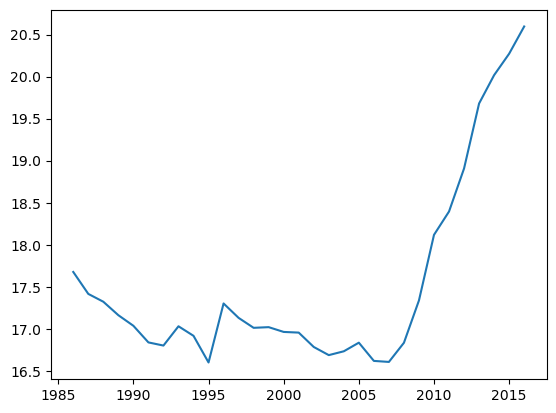

In [7]:
var_eff = "city_mpg"
tb_agg_year = (
    tb_veic
    .groupby('year')
    .agg(
        eff_med_ano = (var_eff, 'mean')
    )
)
plt.plot(tb_agg_year)

In [8]:
tb_veic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32869 entries, 4 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make                     32869 non-null  object 
 1   model                    32869 non-null  object 
 2   year                     32869 non-null  int64  
 3   engine_displacement      32869 non-null  float64
 4   cylinders                32869 non-null  float64
 5   transmission             32869 non-null  object 
 6   drivetrain               32869 non-null  object 
 7   vehicle_class            32869 non-null  object 
 8   fuel_type                32869 non-null  object 
 9   fuel_barrels_year        32869 non-null  float64
 10  city_mpg                 32869 non-null  int64  
 11  highway_mpg              32869 non-null  int64  
 12  combined_mpg             32869 non-null  int64  
 13  co2_emission_grams_mile  32869 non-null  float64
 14  fuel_cost_year        

In [11]:
tb_veic['fuel_type'].value_counts(normalize = True)

Regular                        0.648027
Premium                        0.286836
Gasoline or E85                0.035200
Diesel                         0.020354
Premium or E85                 0.003529
Midgrade                       0.001947
CNG                            0.001825
Gasoline or natural gas        0.000608
Premium and Electricity        0.000487
Premium Gas or Electricity     0.000487
Regular Gas and Electricity    0.000426
Gasoline or propane            0.000243
Regular Gas or Electricity     0.000030
Name: fuel_type, dtype: float64

In [12]:
tb_veic['fuel_type'].value_counts(normalize = False)

Regular                        21300
Premium                         9428
Gasoline or E85                 1157
Diesel                           669
Premium or E85                   116
Midgrade                          64
CNG                               60
Gasoline or natural gas           20
Premium and Electricity           16
Premium Gas or Electricity        16
Regular Gas and Electricity       14
Gasoline or propane                8
Regular Gas or Electricity         1
Name: fuel_type, dtype: int64

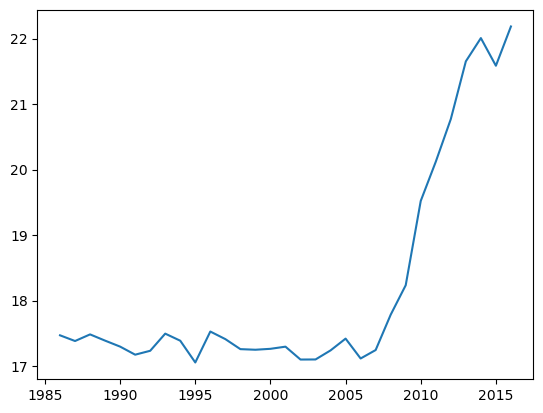

In [13]:
tb_veic_regular = tb_veic[tb_veic['fuel_type'] == "Regular"].copy()
tb_agg_year = (
    tb_veic_regular
    .groupby('year')
    .agg(
        eff_med_ano = (var_eff, 'mean')
    )
)
plt.plot(tb_agg_year)

In [14]:
tb_veic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32869 entries, 4 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make                     32869 non-null  object 
 1   model                    32869 non-null  object 
 2   year                     32869 non-null  int64  
 3   engine_displacement      32869 non-null  float64
 4   cylinders                32869 non-null  float64
 5   transmission             32869 non-null  object 
 6   drivetrain               32869 non-null  object 
 7   vehicle_class            32869 non-null  object 
 8   fuel_type                32869 non-null  object 
 9   fuel_barrels_year        32869 non-null  float64
 10  city_mpg                 32869 non-null  int64  
 11  highway_mpg              32869 non-null  int64  
 12  combined_mpg             32869 non-null  int64  
 13  co2_emission_grams_mile  32869 non-null  float64
 14  fuel_cost_year        

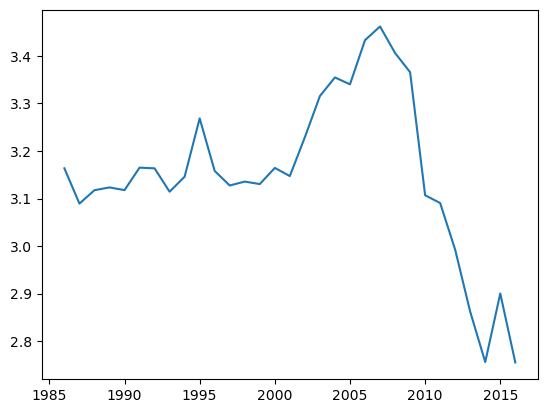

In [16]:
tb_agg_year = (
    tb_veic_regular
    .groupby('year')
    .agg(
        cilindrada_med_ano = ('engine_displacement', 'mean')
    )
)
plt.plot(tb_agg_year)

In [17]:
tb_veic_regular['cat_cilindrada'] = pd.qcut(tb_veic_regular['engine_displacement'], 4)

In [18]:
tb_agg_cyl = (
    tb_veic_regular
    .groupby('cat_cilindrada')
    .agg(
        eff_med_cilindros = (var_eff, 'mean')
    )
)
tb_agg_cyl

,eff_med_cilindros
cat_cilindrada,
"(0.999, 2.2]",22.930051
"(2.2, 2.8]",19.153441
"(2.8, 4.0]",16.098249
"(4.0, 7.4]",13.162247


In [19]:
tb_veic_regular['eff_med_cat_ed'] = (
    tb_veic_regular
    .groupby('cat_cilindrada')[var_eff]
    .transform('mean')
)

In [21]:
tb_veic_regular.head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year,cat_cilindrada,eff_med_cat_ed
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500,"(0.999, 2.2]",22.930051
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400,"(0.999, 2.2]",22.930051
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650,"(2.8, 4.0]",16.098249
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500,"(2.2, 2.8]",19.153441
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400,"(2.2, 2.8]",19.153441


In [24]:
tb_veic_regular['eff_rel_por_cilindrada'] = tb_veic_regular[var_eff]/tb_veic_regular['eff_med_cat_ed']
tb_veic_regular.head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year,cat_cilindrada,eff_med_cat_ed,eff_rel_por_cilindrada
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500,"(0.999, 2.2]",22.930051,0.872218
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400,"(0.999, 2.2]",22.930051,0.959440
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650,"(2.8, 4.0]",16.098249,1.118134
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500,"(2.2, 2.8]",19.153441,0.991989
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400,"(2.2, 2.8]",19.153441,1.096409


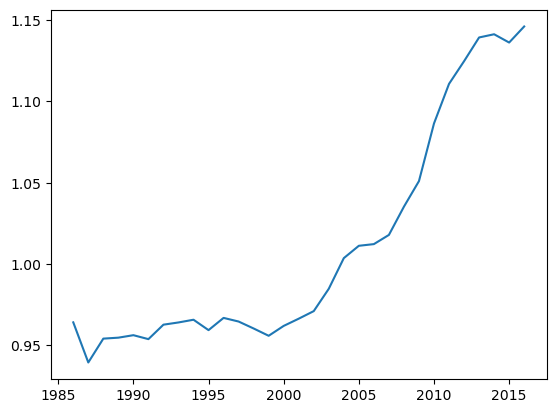

In [26]:
tb_agg_year = (
    tb_veic_regular
    .groupby('year')
    .agg(
        eff_med_cilindros = ('eff_rel_por_cilindrada', 'mean')
    )
)
plt.plot(tb_agg_year)

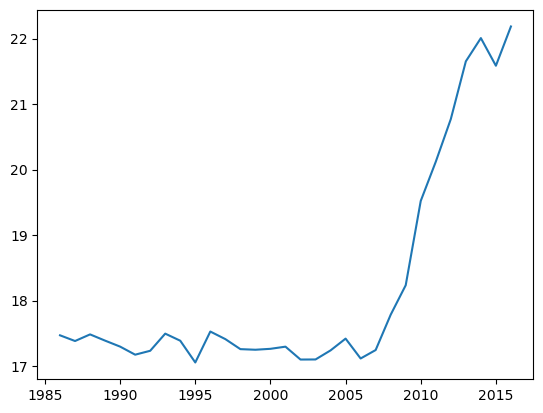

In [28]:
tb_agg_year = (
    tb_veic_regular
    .groupby('year')
    .agg(
        eff_med_cilindros = ('city_mpg', 'mean')
    )
)
plt.plot(tb_agg_year)

# Análise II - O que permite um animal sonhar?

A tabela `tb_sleep` contém informações muito interessantes que nos permitem estudar sob quas condições (ecológicas e constitucionais) um animal pode sonhar (ou em quais condições um animal pode sonhar mais). Vamos investigar juntos essas condições - buscando entender o impacto dos fatores ecológicos e constitucionais sobre a capacidade de um animal sonhar.

Para começar, precisamos determinar qual será a nossa variável resposta: qual variável (ou transformação de variável!) vamos utilizar para representar a capacidade de um animal sonhar. Depois precisamos formular um hipótese clara e objetiva sobre as diferentes variáveis (ou transformação de variáveis!) que queremos avaliar.

In [ ]:
tb_animals = pd.read_csv("http://www.statsci.org/data/general/sleep.txt", sep="\t")
tb_animals.head()
